<a href="https://colab.research.google.com/github/drenu11/Mileage_Prediction/blob/main/Mileage_Prediction_Regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

**Import Data**

In [17]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


**Data Processing**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [19]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [22]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()
print(correlations)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000  


**Remove Missing Values**

In [23]:
df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

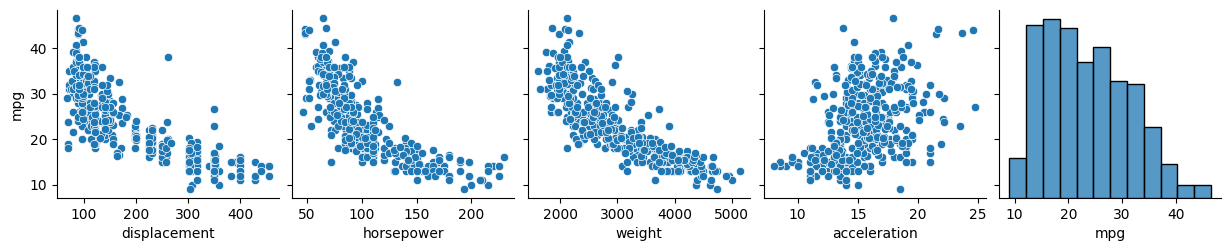

In [25]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

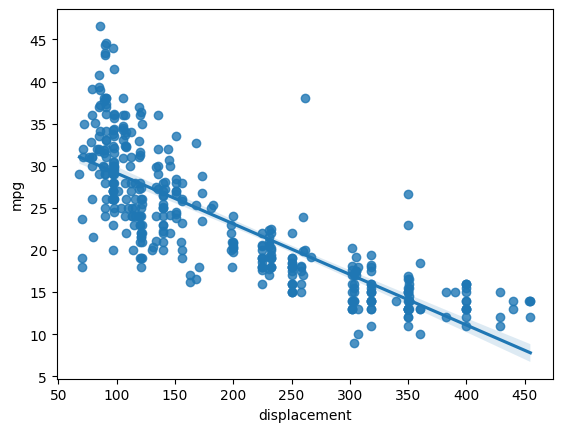

In [26]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

**Define Target Variable y and Feature X**

In [27]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [28]:
y = df['mpg']

In [29]:
y.shape

(392,)

In [30]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [31]:
x.shape

(392, 4)

**Scaling Data**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
x = ss.fit_transform(x)

In [35]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train Test Split Data**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [38]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

**Train or Fit Model**

In [41]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [42]:
lr.intercept_

23.732801400166736

In [43]:
lr.coef_

array([ 0.39815727, -1.54426455, -5.51154127,  0.39788615])

**Prediction**

**Predict Test Data**

In [44]:
y_pred = lr.predict(xtest)

In [45]:
y_pred

array([17.38973496, 11.44187348, 23.08482615, 33.17497148, 19.20461539,
        9.34425678, 30.63124052, 23.40707825, 26.79838637, 26.54320867,
       17.70242138, 24.33347767, 24.83075493, 19.85617672, 14.46519989,
       24.88187557, 29.91995561, 28.02634169, 33.07741757, 24.64840145,
       29.53941361, 33.05332475, 27.66941509, 21.4022394 , 33.07846581,
       17.22605927, 31.36983432, 11.37470607, 24.65531342, 24.53488527,
       16.17594312, 12.81091456, 19.96540296, 13.98461985, 33.26661999,
       27.33542131, 26.38121028, 31.31892331, 28.55348018, 28.73696186,
       19.03009917, 33.84992604, 29.14757398, 11.16044296, 24.37836787,
       21.32904156, 29.90772415, 19.28097804, 26.54960713, 29.34499992,
       29.5561647 , 27.4725217 , 13.38041112, 28.05016474, 31.29180062,
       29.37968095, 24.61934652, 30.24975458, 23.15138838, 21.86204487,
       12.51835741, 18.74048947, 24.71353336, 23.75160577, 21.23748705,
       21.61757146, 21.29547721, 29.16780044, 25.84022305, 17.22

**Model Accuracy**

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [47]:
mean_absolute_error(ytest, y_pred)

3.0903578684027626

In [48]:
mean_absolute_percentage_error(ytest, y_pred)

0.14755306751973188

In [49]:
r2_score(ytest, y_pred)

0.68285169203966

**polynomial Regression**

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [52]:
x_train2 = poly.fit_transform(xtrain)

In [53]:
x_test2 = poly.fit_transform(xtest)

In [54]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [55]:
lr.intercept_

21.532123234469676

In [56]:
lr.coef_

array([-1.00821692, -5.11865975, -2.85793079, -0.76512921,  0.38440567,
        0.37454661,  0.59865445,  1.15895193, -1.37000269,  0.33713003])

In [57]:
y_pred_poly = lr.predict(x_test2)

**Model Accuracy**

In [58]:
mean_absolute_error(ytest, y_pred_poly)

2.6295626557143335

In [59]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.12163746099484231

In [60]:
r2_score(ytest, y_pred_poly)

0.7363587361475179